# Import packages

In [20]:
import numpy as np
import xarray as xr
import cartopy as ctp
import matplotlib.pyplot as plt
import warnings
from matplotlib.colors import BoundaryNorm
from matplotlib import cm
warnings.filterwarnings('ignore')
import os
# !!!!!!!! Attention: ensure you change the current working directory to the foler 'finse_school' that contains this git repository and the 'data' folder.
os.chdir('/Users/gao/Library/CloudStorage/OneDrive-UniversityofCambridge/research/training/202203_DEEPICE_TS1/finse_school')

# Then you can import our self defined functions
from Finse_data_analysis.module.mapplot import (
         hemisphere_plot,
         globe_plot,
     )

# Import data

### Import the pre-industrial (PI) control simulation results

In [2]:
# create a list to store model name:
model_name = ['AWI-ESM-1-1-LR', 'INM-CM4-8', 'MIROC-ES2L', 'MPI-ESM1-2-LR']

# Create an empty dictionary to store the data
pi_simulation = {}

# Here we use xr.open_dataset to read in a single netcdf file.
# For xr.open_dataset: see https://xarray.pydata.org/en/stable/generated/xarray.open_dataset.html
# For netcdf file format, see https://www.unidata.ucar.edu/software/netcdf/
pi_simulation['AWI-ESM-1-1-LR'] = xr.open_dataset('data/CMIP6_PI_simulation_year_mean/tas_Amon_AWI-ESM-1-1-LR_piControl_r1i1p1f1_gn_1855-1954_year_mean.nc')

pi_simulation['INM-CM4-8'] = xr.open_dataset('data/CMIP6_PI_simulation_year_mean/tas_Amon_INM-CM4-8_piControl_r1i1p1f1_gr1_1850-2380_year_mean.nc')

pi_simulation['MIROC-ES2L'] = xr.open_dataset('data/CMIP6_PI_simulation_year_mean/tas_Amon_MIROC-ES2L_piControl_r1i1p1f2_gn_1850-2349_year_mean.nc')

pi_simulation['MPI-ESM1-2-LR'] = xr.open_dataset('data/CMIP6_PI_simulation_year_mean/tas_Amon_MPI-ESM1-2-LR_piControl_r1i1p1f1_gn_1850-2849_year_mean.nc')


Check the dataset

In [3]:
pi_simulation['AWI-ESM-1-1-LR']

<xarray.Dataset>
Dimensions:    (time: 100, bnds: 2, lon: 192, lat: 96)
Coordinates:
  * time       (time) datetime64[ns] 1855-07-01T06:00:00 ... 1954-07-01T06:00:00
  * lon        (lon) float64 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
  * lat        (lat) float64 -88.57 -86.72 -84.86 -83.0 ... 84.86 86.72 88.57
    height     float64 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    lon_bnds   (lon, bnds) float64 ...
    lat_bnds   (lat, bnds) float64 ...
    tas        (time, lat, lon) float32 ...
Attributes: (12/46)
    CDI:                    Climate Data Interface version 2.0.3 (https://mpi...
    source:                 AWI-ESM 1.1 LR (2018): \naerosol: none\natmos: EC...
    institution:            Alfred Wegener Institute, Helmholtz Centre for Po...
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    ...                     ...
    variable_id:            tas
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by Alfred Wegener Insti...
    cmor_version:           3.5.0
    tracking_id:            hdl:21.14100/da909048-e78e-4153-8230-69054d9fd5e5
    CDO:                    Climate Data Operators version 2.0.3 (https://mpi...

check the variable 'tas'

In [4]:
pi_simulation['AWI-ESM-1-1-LR'].tas

<xarray.DataArray 'tas' (time: 100, lat: 96, lon: 192)>
[1843200 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1855-07-01T06:00:00 ... 1954-07-01T06:00:00
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
  * lat      (lat) float64 -88.57 -86.72 -84.86 -83.0 ... 83.0 84.86 86.72 88.57
    height   float64 2.0
Attributes:
    standard_name:     air_temperature
    long_name:         Near-Surface Air Temperature
    units:             K
    CDI_grid_type:     gaussian
    CDI_grid_num_LPE:  48
    cell_methods:      area: time: mean
    comment:           near-surface (usually, 2 meter) air temperature
    cell_measures:     area: areacella
    history:           2020-02-12T14:21:57Z altered by CMOR: Treated scalar d...

### Import the Last Glacial Maximum (LGM) simulation results

In [11]:
# Create an empty dictionary to store the data
lgm_simulation = {}

# When the number of models is large, we can create a for loop to read in dataset

for i in range(len(model_name)):
    print(str(i) + '. read in files: ' + 'data/CMIP6_LGM_simulation_year_mean/tas_Amon_' + model_name[i] + '*.nc')
    
    # Here we use xr.open_mfdataset, which can be used to read in multiple netcdf file, see: https://xarray.pydata.org/en/stable/generated/xarray.open_mfdataset.html
    # we also used a string glob in the form "path/to/my/files/*.nc", where '*' can represent any length of any characters
    lgm_simulation[model_name[i]] = xr.open_mfdataset('data/CMIP6_LGM_simulation_year_mean/tas_Amon_' + model_name[i] + '*.nc')

0. read in files: data/CMIP6_LGM_simulation_year_mean/tas_Amon_AWI-ESM-1-1-LR*.nc
1. read in files: data/CMIP6_LGM_simulation_year_mean/tas_Amon_INM-CM4-8*.nc
2. read in files: data/CMIP6_LGM_simulation_year_mean/tas_Amon_MIROC-ES2L*.nc
3. read in files: data/CMIP6_LGM_simulation_year_mean/tas_Amon_MPI-ESM1-2-LR*.nc


check the dataset

In [12]:
lgm_simulation['AWI-ESM-1-1-LR']

<xarray.Dataset>
Dimensions:    (time: 100, bnds: 2, lon: 192, lat: 96)
Coordinates:
  * time       (time) object 3901-07-01 06:00:00 ... 4000-07-01 06:00:00
  * lon        (lon) float64 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
  * lat        (lat) float64 -88.57 -86.72 -84.86 -83.0 ... 84.86 86.72 88.57
    height     float64 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object dask.array<open_dataset-b23a249a1431199170...
    lon_bnds   (lon, bnds) float64 dask.array<open_dataset-b23a249a1431199170...
    lat_bnds   (lat, bnds) float64 dask.array<open_dataset-b23a249a1431199170...
    tas        (time, lat, lon) float32 dask.array<open_dataset-b23a249a14311...
Attributes: (12/39)
    CDI:                   Climate Data Interface version 2.0.3 (https://mpim...
    source:                AWI-ESM 1.1 LR (2018): \naerosol: none\natmos: ECH...
    institution:           Alfred Wegener Institute, Helmholtz Centre for Pol...
    Conventions:           CF-1.7 CMIP-6.2
    activity_id:           PMIP
    creation_date:         2020-03-15T15:25:46Z
    ...                    ...
    variable_id:           tas
    variant_label:         r1i1p1f1
    license:               CMIP6 model data produced by Alfred Wegener Instit...
    cmor_version:          3.5.0
    tracking_id:           hdl:21.14100/4b93047e-ae9a-4a56-9b1f-6bc639373c52
    CDO:                   Climate Data Operators version 2.0.3 (https://mpim...

check the variables

In [13]:
lgm_simulation['AWI-ESM-1-1-LR'].tas

<xarray.DataArray 'tas' (time: 100, lat: 96, lon: 192)>
dask.array<open_dataset-b23a249a1431199170ca9b5b351c82b0tas, shape=(100, 96, 192), dtype=float32, chunksize=(100, 96, 192), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 3901-07-01 06:00:00 ... 4000-07-01 06:00:00
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
  * lat      (lat) float64 -88.57 -86.72 -84.86 -83.0 ... 83.0 84.86 86.72 88.57
    height   float64 ...
Attributes:
    standard_name:     air_temperature
    long_name:         Near-Surface Air Temperature
    units:             K
    CDI_grid_type:     gaussian
    CDI_grid_num_LPE:  48
    cell_methods:      area: time: mean
    comment:           near-surface (usually, 2 meter) air temperature
    cell_measures:     area: areacella
    history:           2020-03-15T15:25:46Z altered by CMOR: Treated scalar d...

# Process and visualize data

### Calculate annual mean value

In [5]:
# create a dictionary to store annual mean results of four models
pi_simulation_am = {}

for i in range(len(model_name)):
    # as axis 0 is the time axis, we calculate mean on it
    # xarray.DataArray.mean: https://xarray.pydata.org/en/stable/generated/xarray.DataArray.mean.html
    pi_simulation_am[model_name[i]] = \
        pi_simulation[model_name[i]].tas.mean(axis=0)


### Plot the annual mean data

0-0: plot AWI-ESM-1-1-LR
0-1: plot INM-CM4-8
1-0: plot MIROC-ES2L
1-1: plot MPI-ESM1-2-LR


Text(0.5, 0, 'Annual mean 2m temperature [$K$] in PI simulation')

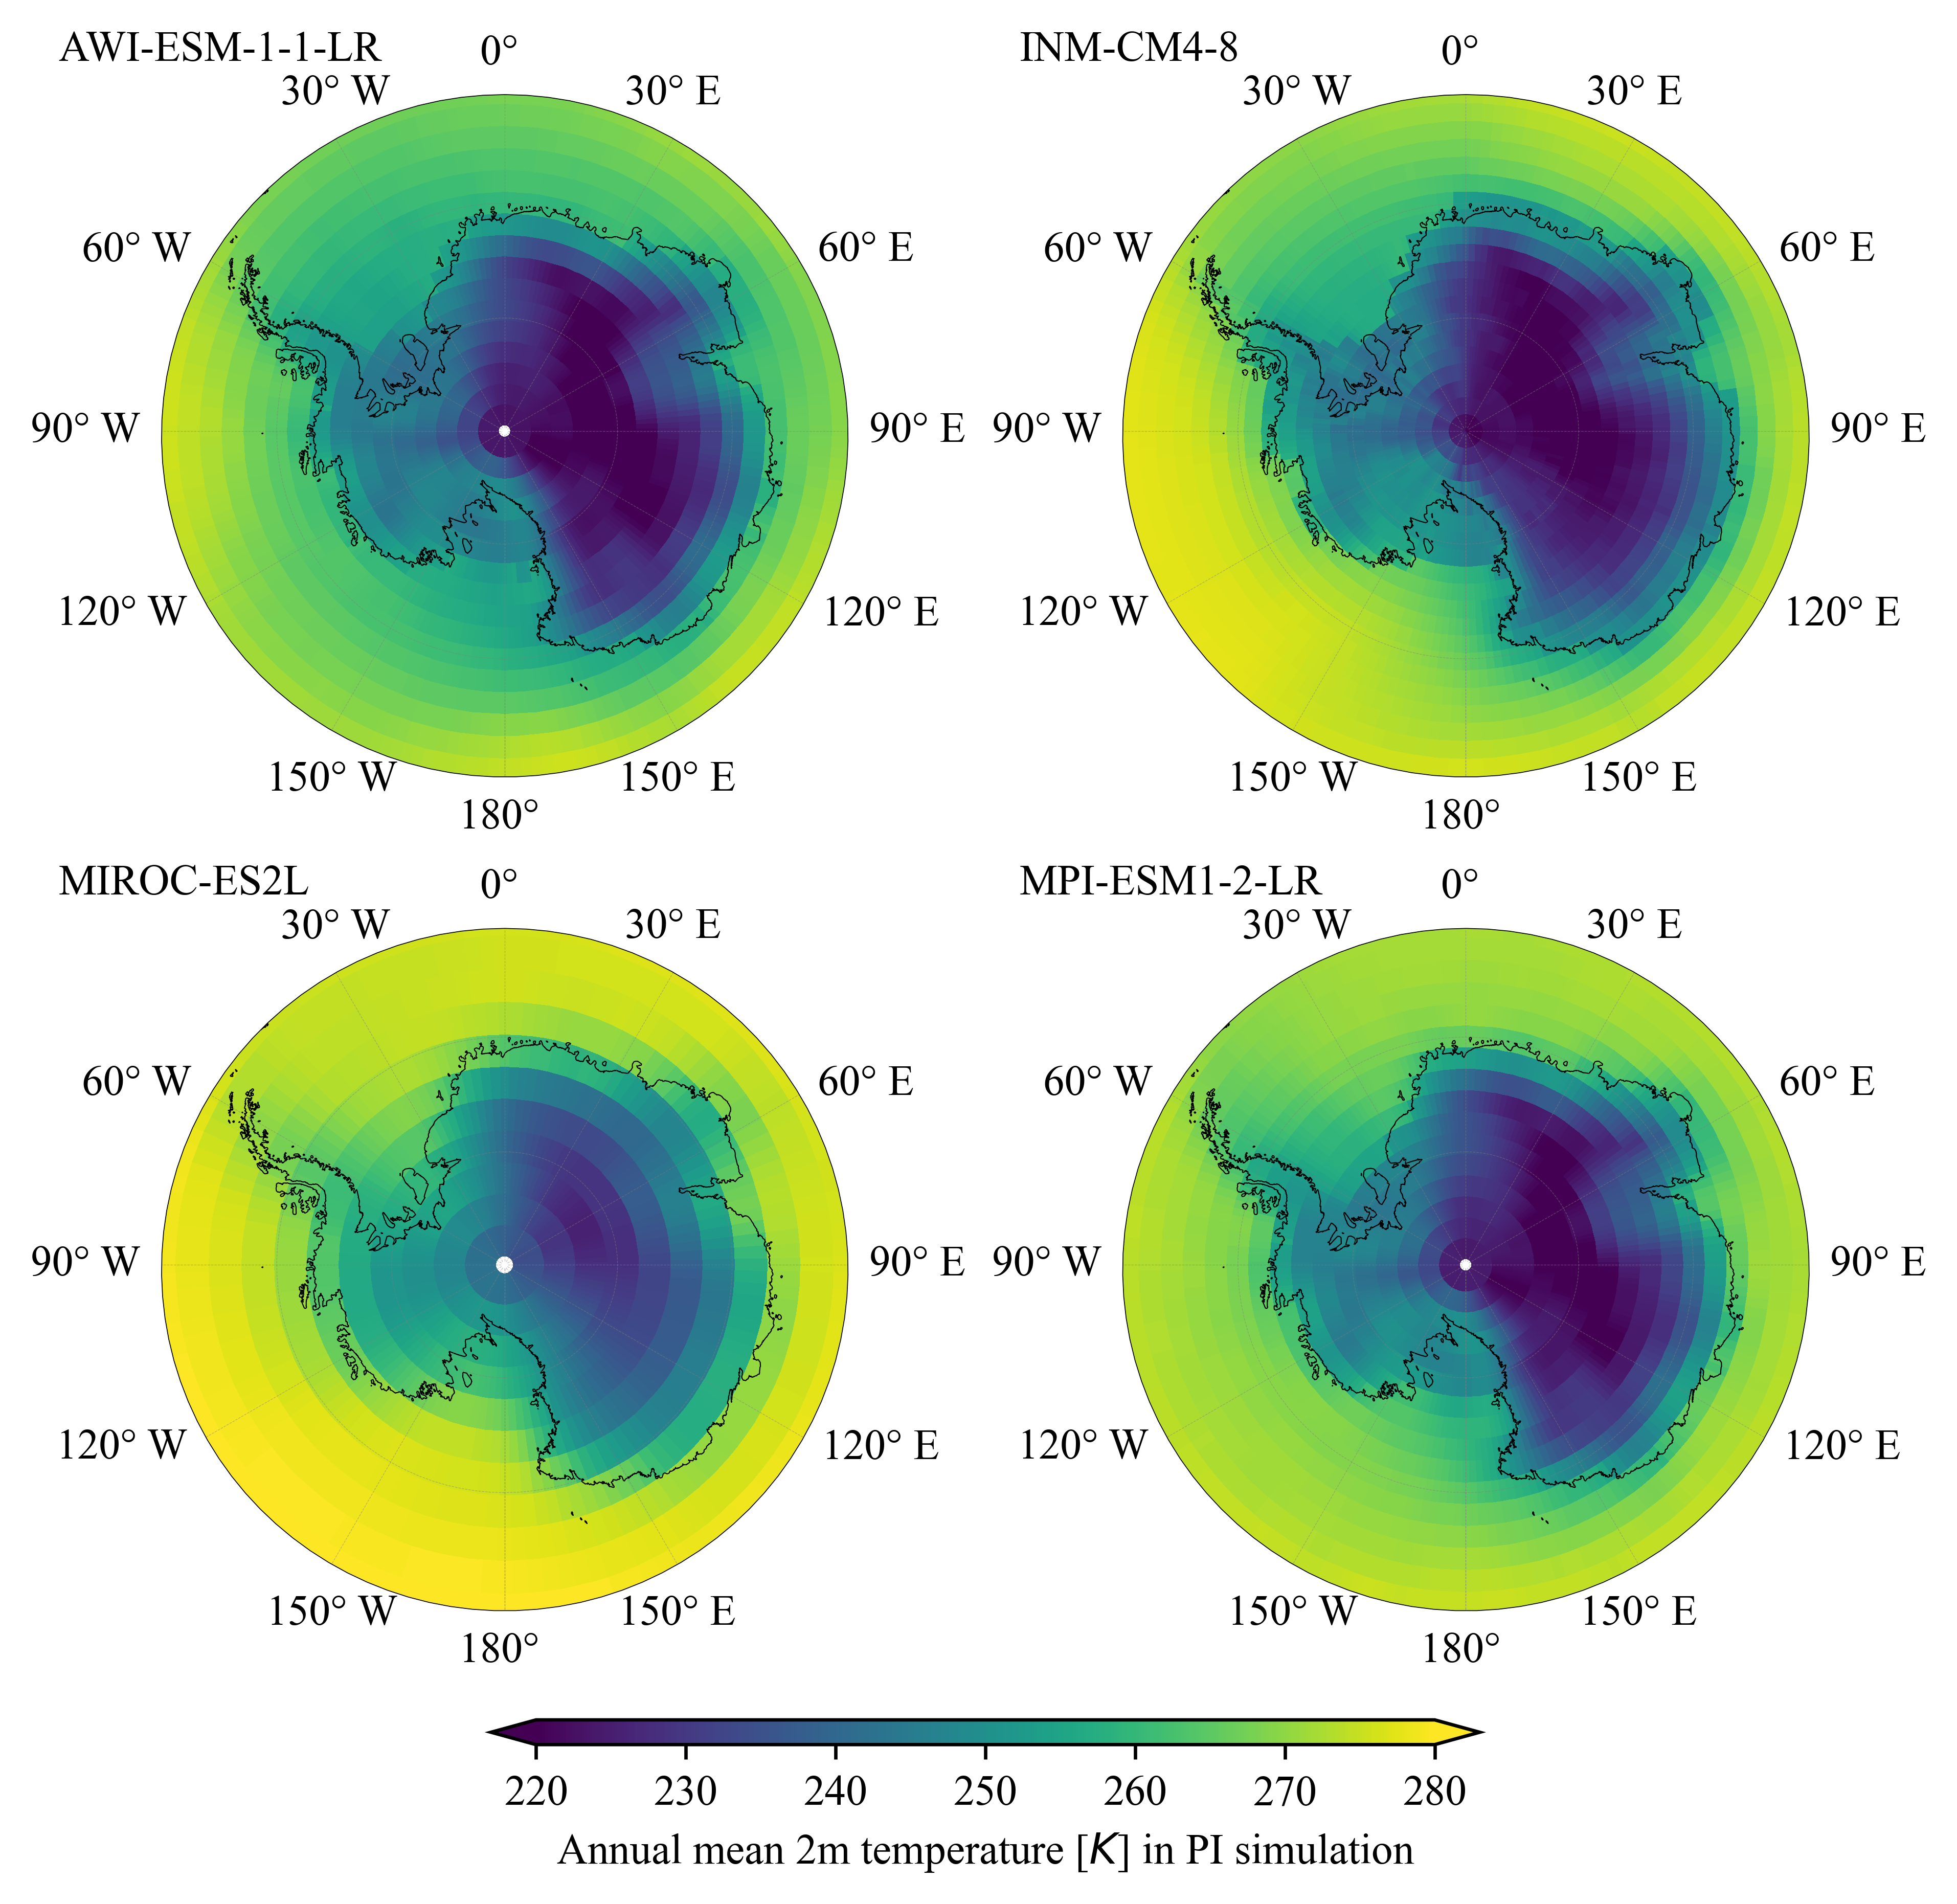

In [39]:
# We will create a figure with four panels, one for each model
nrow = 2
ncol = 2

# here we define the color bar properties.
pltlevel = np.arange(220, 280.01, 0.2)
pltticks = np.arange(220, 280.01, 10)


fig, axs = plt.subplots(
    nrow, ncol, figsize=np.array([8.8*ncol, 9.3*nrow + 2]) / 2.54,
    subplot_kw={'projection': ctp.crs.SouthPolarStereo()},
    gridspec_kw={'hspace': 0.12, 'wspace': 0.4},
    )

for i in range(nrow):
    for j in range(ncol):
        print(str(i) + '-' + str(j) + ': plot ' + model_name[i * 2 + j])
        axs[i, j] = hemisphere_plot(northextent=-60, ax_org = axs[i, j])
        
        plt_cmp = axs[i, j].pcolormesh(
            pi_simulation_am[model_name[i * 2 + j]].lon,
            pi_simulation_am[model_name[i * 2 + j]].lat,
            pi_simulation_am[model_name[i * 2 + j]],
            norm=BoundaryNorm(pltlevel, ncolors=len(pltlevel)),
            cmap=cm.get_cmap('viridis', len(pltlevel)),
            transform=ctp.crs.PlateCarree(),
        )
        
        axs[i, j].text(
            -0.15, 1.05, model_name[i * 2 + j],
            transform=axs[i, j].transAxes)

cbar = fig.colorbar(
    plt_cmp, ax=axs, orientation="horizontal", pad=0.02,
    fraction=0.14, shrink=0.6, aspect=40, anchor=(0.5, 0.7),
    ticks=pltticks, extend='both')
cbar.ax.set_xlabel(
    'Annual mean 2m temperature [$K$] in PI simulation',
    linespacing=1.5
)

### Exercises: Can you calculate and plot the Annual mean 2m temperature in LGM simulation?